# Data Exploration & Preprocessing

## Library and Resource Declaration

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.text_preprocessing import preprocess_text

## First Look to the Dataset & Text Preprocessing Application 

In [11]:
# Dataset loading
df = pd.read_csv("../dataset/cyberbullying_tweets.csv")

# Some quality controll
print("Row and column number:\n", df.shape)
print("\nNull value in every columns:\n", df.isnull().sum())
print("\nColumn names and types:\n", df.dtypes)

# Preprocessing application
df["clean_text"] = df["tweet_text"].apply(preprocess_text)

# Some post-preprocessing information
print("\nHead:")
print(df[["tweet_text", "clean_text"]].head())

print("\nDataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df["cyberbullying_type"].value_counts())


Row and column number:
 (47692, 2)

Null value in every columns:
 tweet_text            0
cyberbullying_type    0
dtype: int64

Column names and types:
 tweet_text            object
cyberbullying_type    object
dtype: object

Head:
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                          clean_text  
0                 word katandandr food crapilici mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                     classi whore red velvet cupcak  
3    meh thank head concern anoth angri dude twitter  
4  isi account pretend kurdish account like islam...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data colum

## Class Distribution Plot

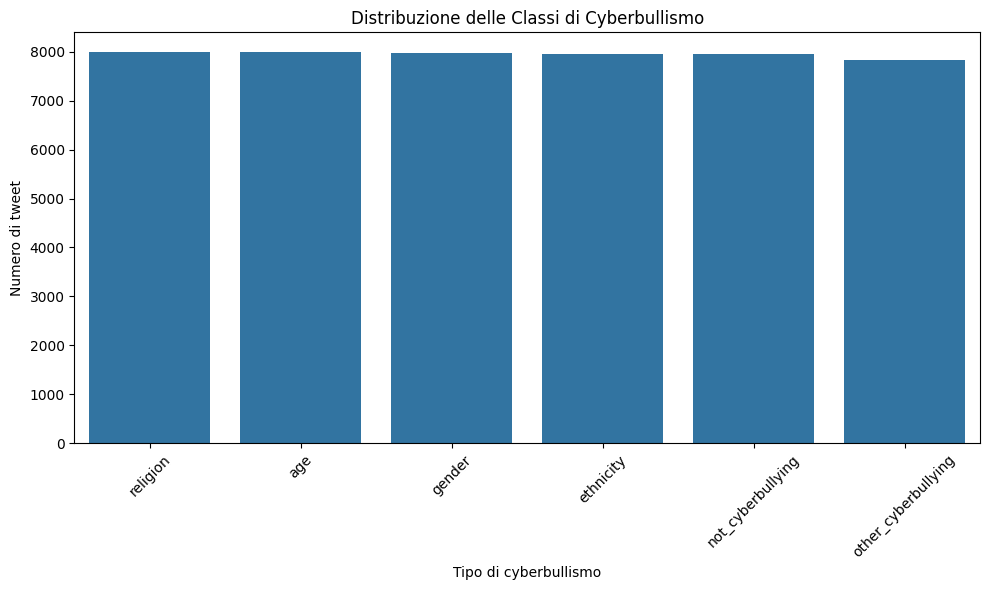

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type', order=df['cyberbullying_type'].value_counts().index)
plt.title('Distribuzione delle Classi di Cyberbullismo')
plt.xlabel('Tipo di cyberbullismo')
plt.ylabel('Numero di tweet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Text Lenght Plot

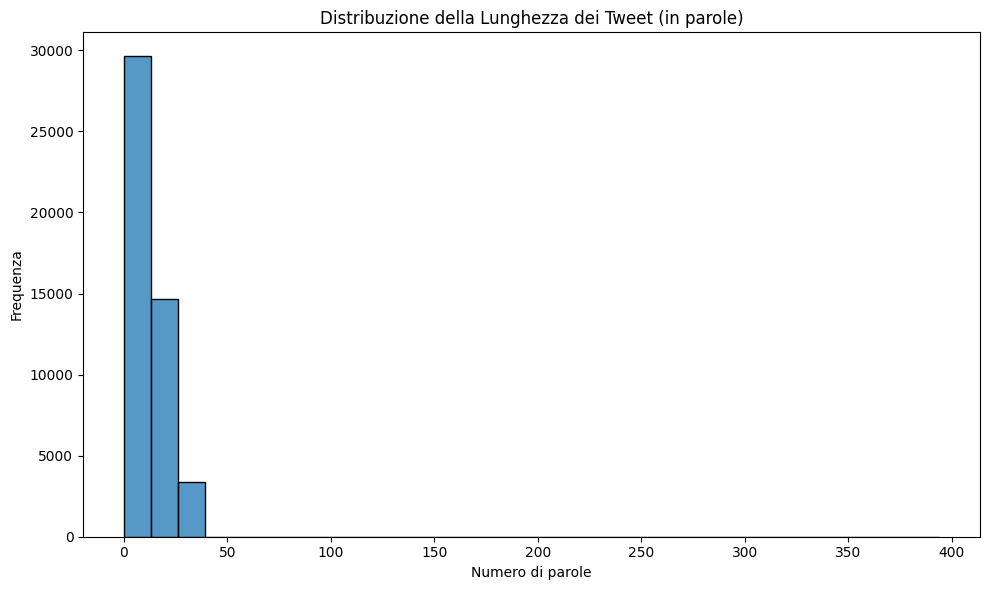

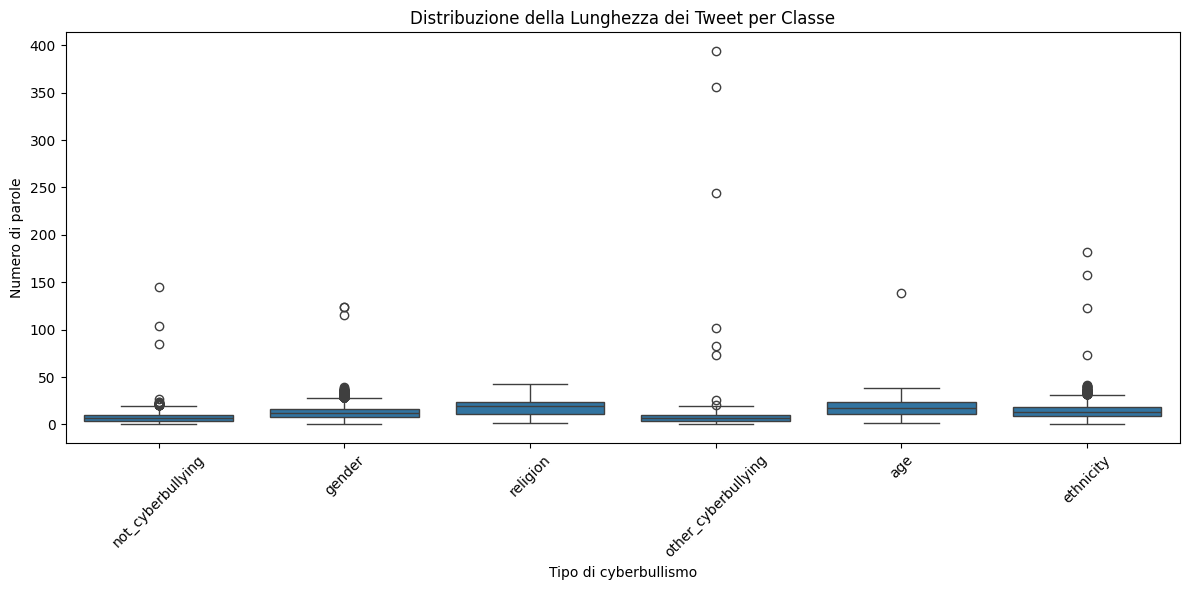

In [13]:
df['tweet_length'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=False)
plt.title('Distribuzione della Lunghezza dei Tweet (in parole)')
plt.xlabel('Numero di parole')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cyberbullying_type', y='tweet_length')
plt.title('Distribuzione della Lunghezza dei Tweet per Classe')
plt.xlabel('Tipo di cyberbullismo')
plt.ylabel('Numero di parole')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## WordCloud by Labels

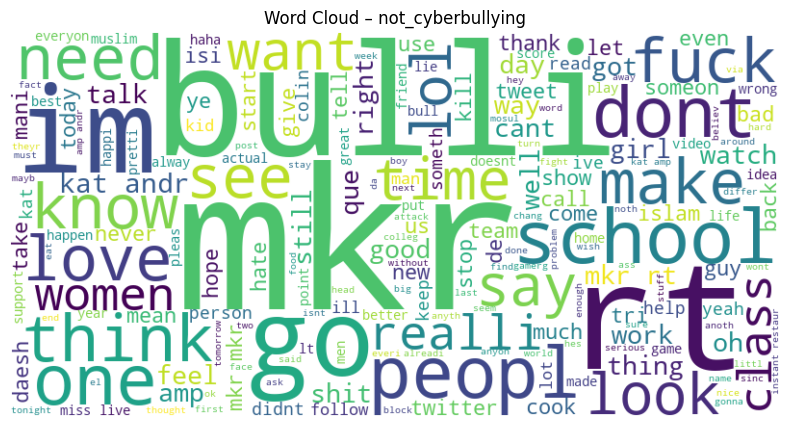

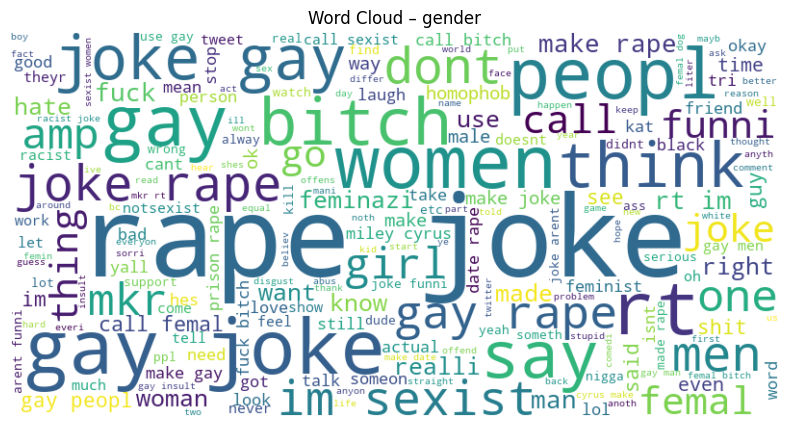

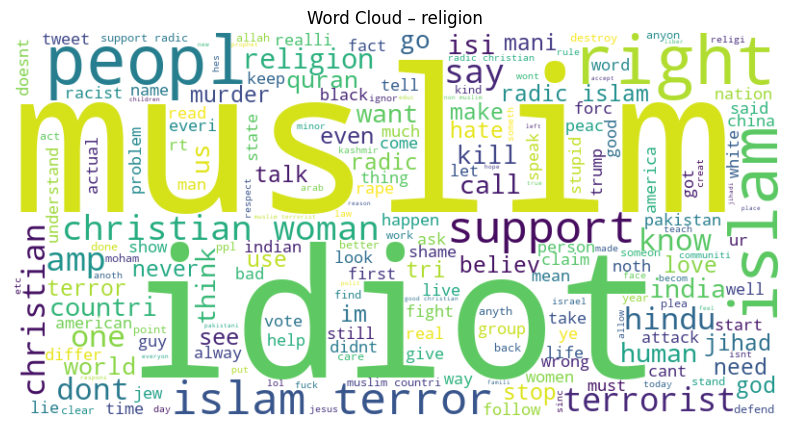

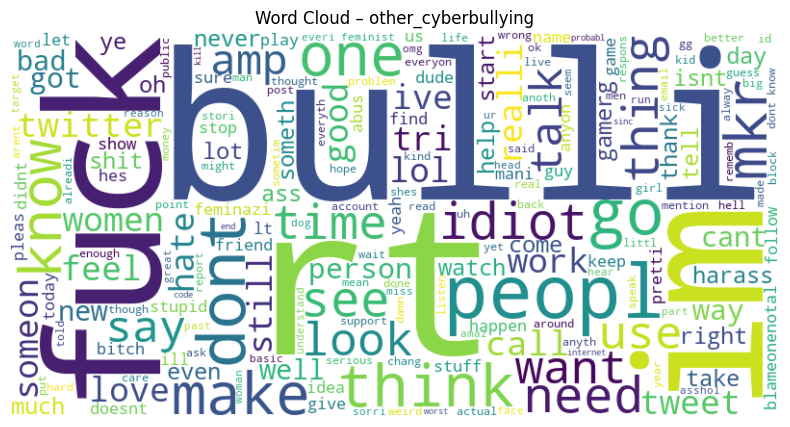

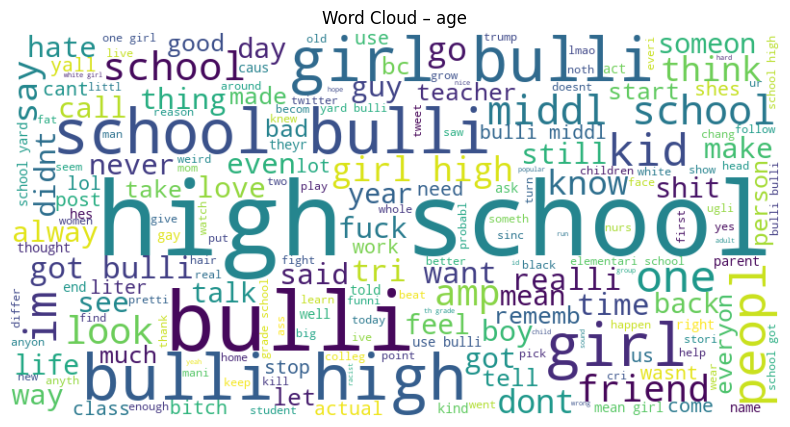

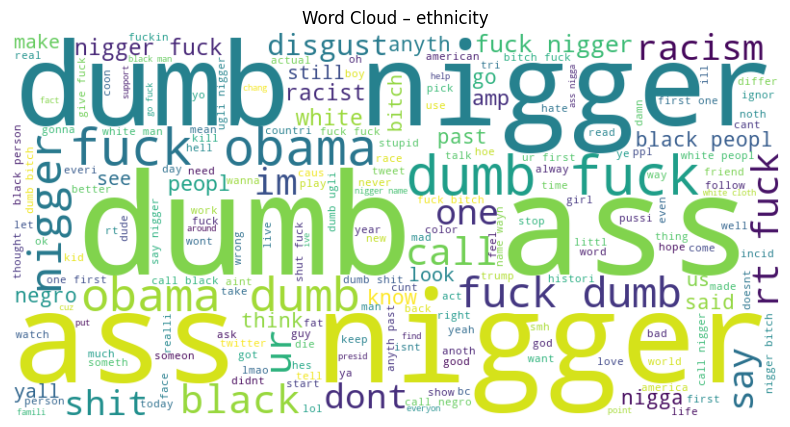

In [14]:
unique_labels = df['cyberbullying_type'].unique()

for label in unique_labels:
    text = ' '.join(df[df['cyberbullying_type'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud – {label}')
    plt.show()


## Train Set & Test Set Split

In [15]:
df_export = df.copy()
df_export['binary_label'] = df_export['cyberbullying_type'].apply(
    lambda x: 'cyberbullying' if x != 'not_cyberbullying' else 'not_cyberbullying'
)
df_export = df_export[['clean_text', 'binary_label', 'cyberbullying_type']].copy()
df_export.columns = ['text', 'binary_label', 'multiclass_label']

df_export = df_export[df_export['text'].notna() & df_export['text'].str.strip().astype(bool)] 

train_df, test_df = train_test_split(
    df_export,
    test_size=0.2,
    stratify=df_export['multiclass_label'],
    random_state=42
)

train_df.to_csv('../dataset/training_set.csv', index=False)
test_df.to_csv('../dataset/test_set.csv', index=False)


### Verifing the classes distribution

In [16]:
print("=== TRAINING SET DISTRIBUTION===\n")

print(train_df['multiclass_label'].value_counts())
print(train_df['binary_label'].value_counts())

print("\n\n=== TEST SET DISTRIBUTION ===\n")

print(test_df['multiclass_label'].value_counts())
print(test_df['binary_label'].value_counts())


=== TRAINING SET DISTRIBUTION===

multiclass_label
religion               6398
age                    6393
ethnicity              6368
gender                 6354
not_cyberbullying      6243
other_cyberbullying    6081
Name: count, dtype: int64
binary_label
cyberbullying        31594
not_cyberbullying     6243
Name: count, dtype: int64


=== TEST SET DISTRIBUTION ===

multiclass_label
religion               1600
age                    1599
ethnicity              1592
gender                 1588
not_cyberbullying      1561
other_cyberbullying    1520
Name: count, dtype: int64
binary_label
cyberbullying        7899
not_cyberbullying    1561
Name: count, dtype: int64
